In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import categoricalclustering as cc
import pandas as pd
import numpy as np
import kmedoids
from sklearn.metrics.pairwise import manhattan_distances
from scipy.cluster.hierarchy import fcluster

CatRED:


Clustering: 100%|██████████| 99/99 [00:00<00:00, 722.35it/s]


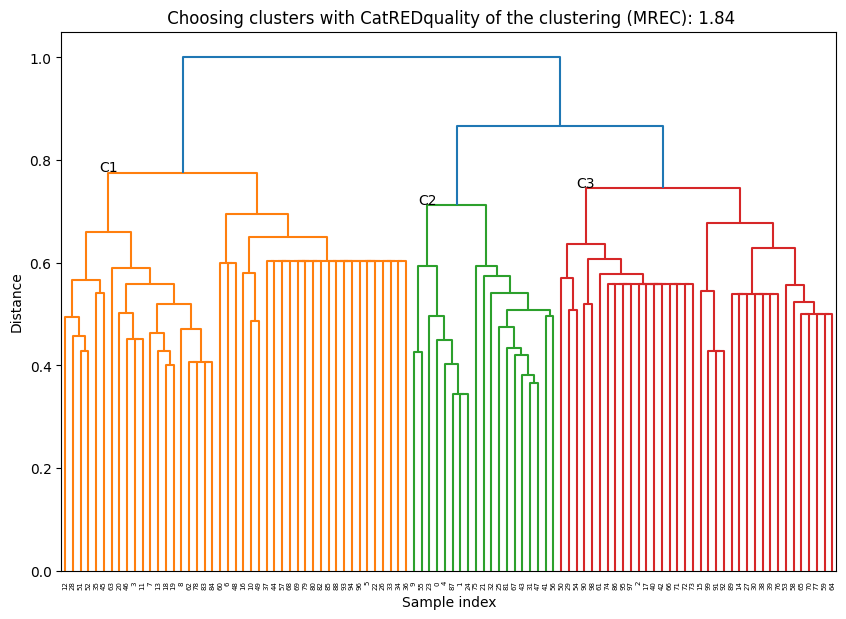

Number of Cluster 3
ares: 3.6629187569295882
mrec: 1.8398722399370762
category_uitlity: 1.981507520467836
silhouette: 0.4732683028439599


Clustering: 100%|██████████| 99/99 [00:00<00:00, 655.19it/s]


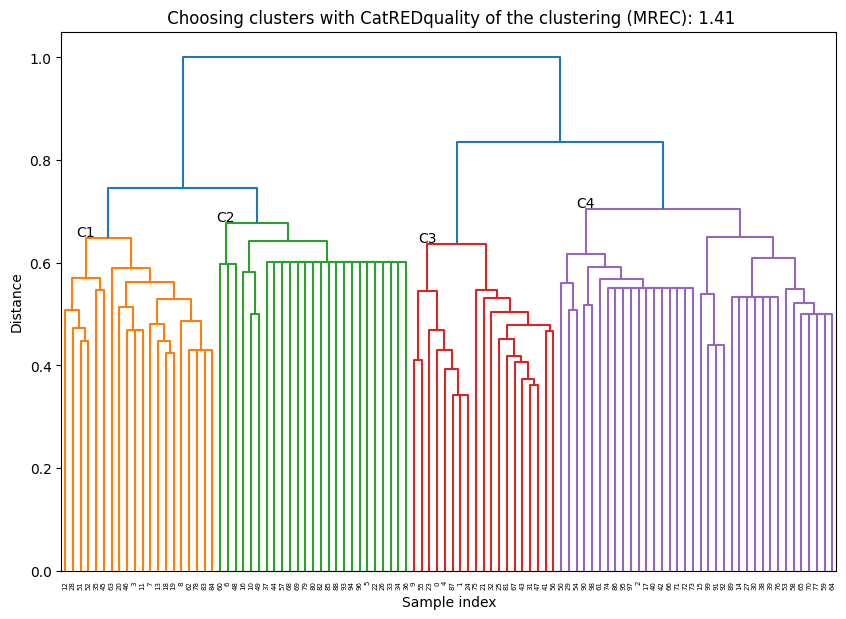

Number of Cluster 4
ares: 4.432084036961195
mrec: 1.413559125597195
category_uitlity: 2.429341409356725
silhouette: 0.44724189510292506


Clustering: 100%|██████████| 99/99 [00:00<00:00, 611.33it/s]


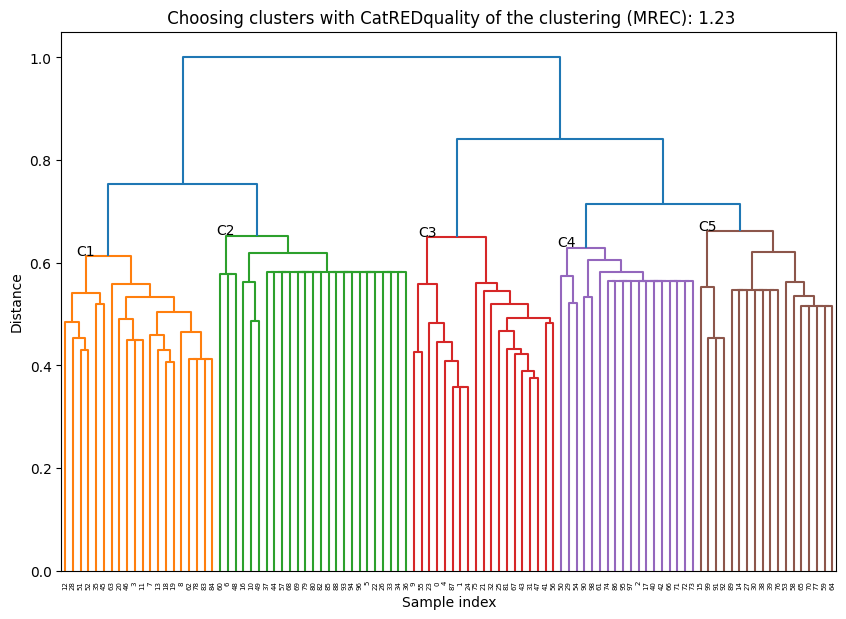

Number of Cluster 5
ares: 5.014988928942941
mrec: 1.232395461794174
category_uitlity: 2.8668327426900584
silhouette: 0.4126160569116872


Clustering: 100%|██████████| 99/99 [00:00<00:00, 597.35it/s]


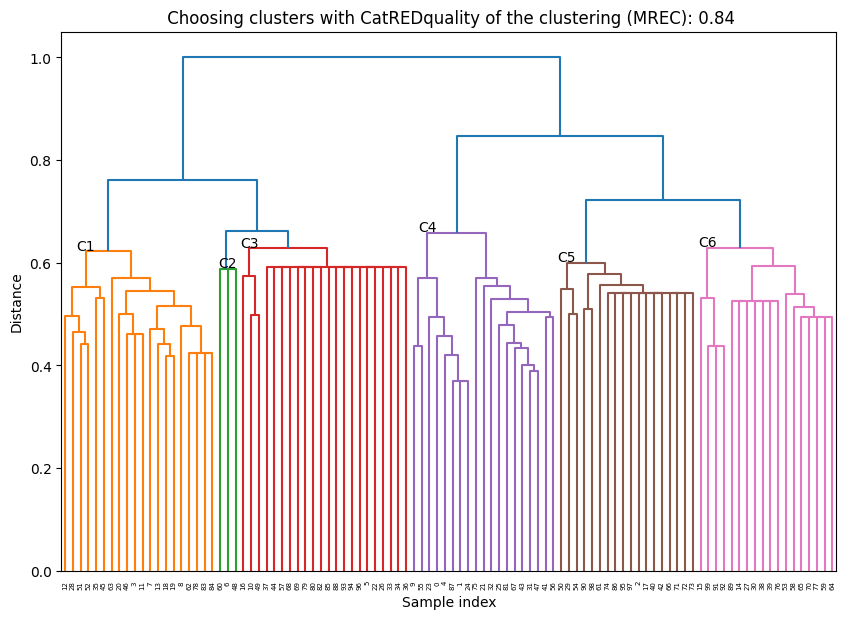

Number of Cluster 6
ares: 5.256994059833645
mrec: 0.8387434680339334
category_uitlity: 3.027048015417331
silhouette: 0.4187835229905189


Clustering: 100%|██████████| 99/99 [00:00<00:00, 628.44it/s]


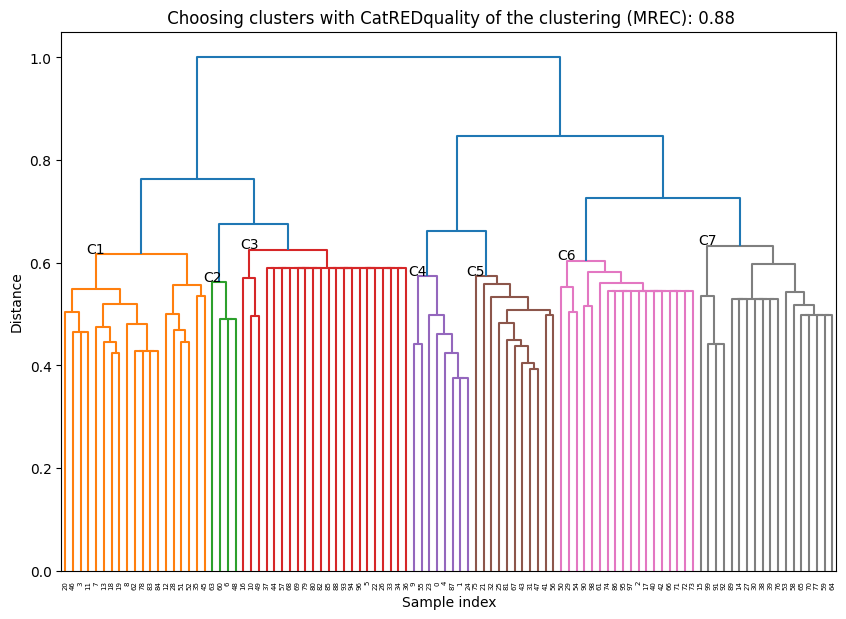

Number of Cluster 7
ares: 5.729613784042247
mrec: 0.8829969105294166
category_uitlity: 3.364767288144604
silhouette: 0.4497256908696283


Clustering: 100%|██████████| 99/99 [00:00<00:00, 552.71it/s]


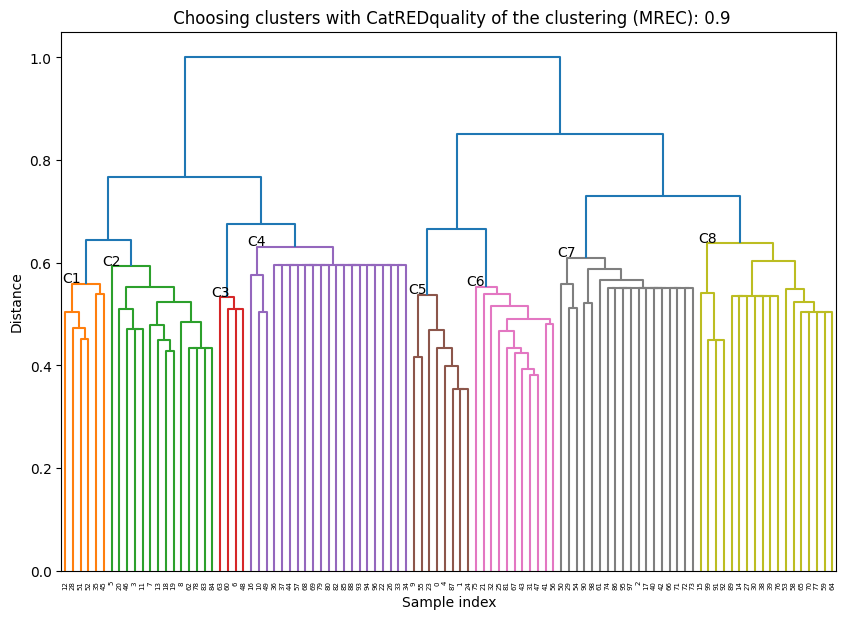

Number of Cluster 8
ares: 5.982334076875125
mrec: 0.8996801295151746
category_uitlity: 3.5252561933621935
silhouette: 0.46305751123654226


Clustering: 100%|██████████| 99/99 [00:00<00:00, 563.29it/s]


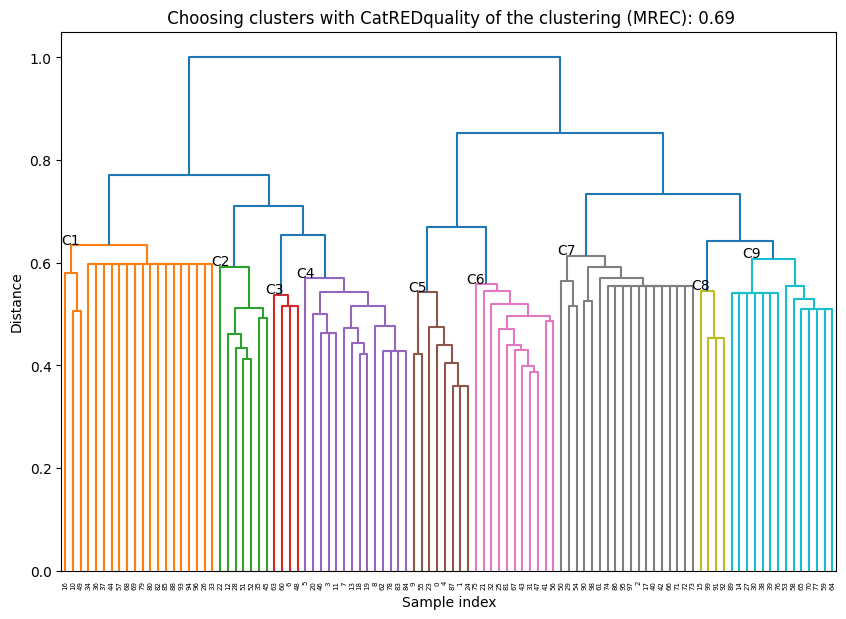

Number of Cluster 9
ares: 6.12641271805757
mrec: 0.6902617547966505
category_uitlity: 3.6019135425685427
silhouette: 0.46145052161379213


Clustering: 100%|██████████| 99/99 [00:00<00:00, 462.01it/s]


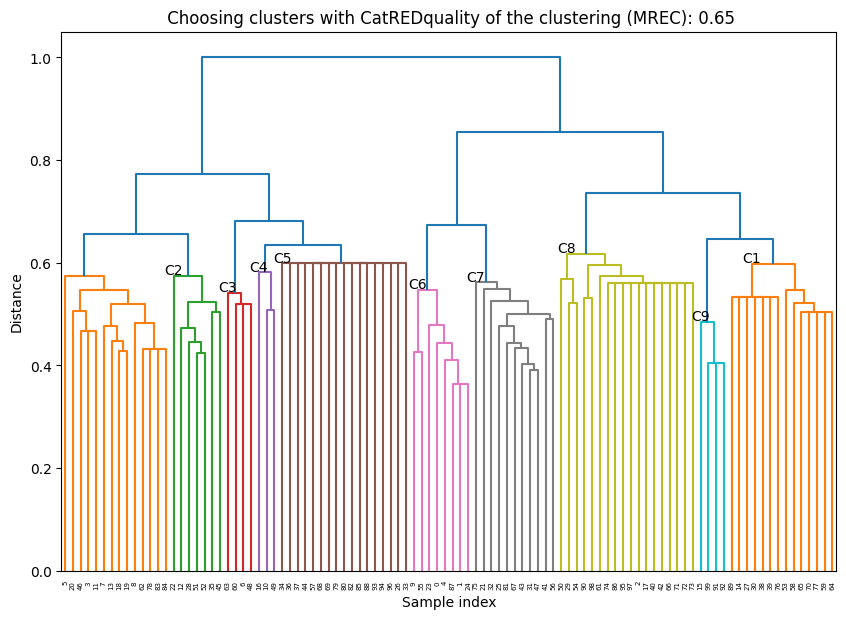

Number of Cluster 10
ares: 6.344361539098628
mrec: 0.6485878059526744
category_uitlity: 3.7708308759018756
silhouette: 0.48386092802437036


In [8]:
#CatRED

df = pd.read_excel("elma2019.xlsx", header=0, index_col=[0]).fillna(0.0).astype(np.int64)
df_merged = df.copy()
df_merged = cc.merge_onehot_categories(df_merged)

df_temp = df.copy()
print("CatRED:")
for k in range(3,11):
    catclustres = cc.catred(df_merged)
    weights = pd.Series(np.ones(len(df_merged.columns)), index=df_merged.columns)
    cc.analyse_linkagematrix(df_merged, catclustres.linkage_matrix, weights, k, title=f' Choosing clusters with CatRED')
    df_temp['cluster'] = fcluster(catclustres.linkage_matrix, k, criterion='maxclust')
    df_merged['cluster'] = fcluster(catclustres.linkage_matrix, k, criterion='maxclust')
    diss = manhattan_distances(df.values)
    print(f"Number of Cluster: {k}")
    print(f"ares: {cc.ares(df_merged)}")
    print(f"mrec: {cc.mrec(df_merged)}")
    print(f"category_uitlity: {cc.category_utility(df_merged)}")   
    print(f"silhouette: {kmedoids.silhouette(diss, df_temp['cluster'].values)[0]}") 
    



In [11]:
#LIMBO

df = pd.read_excel("elma2019.xlsx", header=0, index_col=[0]).fillna(0.0).astype(np.int64)
df_merged = df.copy()
df_merged = cc.merge_onehot_categories(df_merged)

df_temp = df.copy()
print("LIMBO:")
for k in range(3,11):
    catclustres = cc.limbo(df, k)
    df_temp['cluster'] = catclustres.clusters
    df_merged['cluster'] = catclustres.clusters
    diss = manhattan_distances(df.values)
    print(f"l{k}")
    print(f"ares: {cc.ares(df_merged)}")
    print(f"mrec: {cc.mrec(df_merged)}")
    print(f"category_uitlity: {cc.category_utility(df_merged)}")   
    print(f"silhouette: {kmedoids.silhouette(diss, df_temp['cluster'].values)[0]}") 

LIMBO:
l3
ares: 3.516323175273802
mrec: 1.845685401228856
category_uitlity: 1.9992433211951446
silhouette: 0.42783525027005953
l4
ares: 4.337314997840275
mrec: 1.4085326432167031
category_uitlity: 2.422712130718954
silhouette: 0.44327608424674575
l5
ares: 4.700262350501946
mrec: 1.5598972832521882
category_uitlity: 2.686551856630824
silhouette: 0.42999686299208123
l6
ares: 5.349685945406087
mrec: 1.1102716278404339
category_uitlity: 3.158236934137758
silhouette: 0.45740544757756774
l7
ares: 5.487928723475957
mrec: 0.34108241783568705
category_uitlity: 3.2252415555555554
silhouette: 0.4169796057680874
l8
ares: 5.763154738871931
mrec: 0.34820308375424425
category_uitlity: 3.3890759617853408
silhouette: 0.4329799871057199
l9
ares: 6.163778020168165
mrec: 0.42998913394348737
category_uitlity: 3.6348391739130435
silhouette: 0.48304172878962953
l10
ares: 6.478897692998925
mrec: 0.009827661654736808
category_uitlity: 3.8342231739130437
silhouette: 0.5346706899167554


In [ ]:
#COOLCAT

df = pd.read_excel("elma2019.xlsx", header=0, index_col=[0]).fillna(0.0).astype(np.int64)
df_merged = df.copy()
df_merged = cc.merge_onehot_categories(df_merged)

df_temp = df.copy()
print("COOLCAT:")
for k in range(3,11):
    catclustres = cc.coolcat(df, k)
    df_temp['cluster'] = catclustres.clusters
    df_merged['cluster'] = catclustres.clusters
    diss = manhattan_distances(df.values)
    print(f"l{k}")
    print(f"ares: {cc.ares(df_merged)}")
    print(f"mrec: {cc.mrec(df_merged)}")
    print(f"category_uitlity: {cc.category_utility(df_merged)}")   
    print(f"silhouette: {kmedoids.silhouette(diss, df_temp['cluster'].values)[0]}") 


COOLCAT:
l3
ares: 3.1487327644407173
mrec: 0.8320284266307589
category_uitlity: 1.6609500110864746
silhouette: 0.4096088552797271
l4
ares: 3.8560541287540637
mrec: 0.5419781388389291
category_uitlity: 2.160334310533515
silhouette: 0.4124331248298425
l5
ares: 4.527972050955383
mrec: 0.7622983822264278
category_uitlity: 2.5325547777777775
silhouette: 0.4485557836904321
l6
ares: 5.070865035738274
mrec: 0.813914701364705
category_uitlity: 2.896595525252525
silhouette: 0.4490832617599449
l7
ares: 5.110109690617003
mrec: 0.5680702295731033
category_uitlity: 2.8807065203775206
silhouette: 0.433999893944231
l8
ares: 5.284156924472821
mrec: 0.1790163818318682
category_uitlity: 3.1344499594964415
silhouette: 0.3443625394004302
l9
ares: 5.9177052553614296
mrec: 0.05787888553461684
category_uitlity: 3.5366100415140416
silhouette: 0.4033526700783777
l10
ares: 6.266327054978465
mrec: 0.18445976212088233
category_uitlity: 3.6712436832298136
silhouette: 0.4334640372091216
